# A Python implementation of gradient descent

I implemented gradient descent approach in Python on a 1D and 2D functions. The function has lots of local minima
and gradient descent doesn't work too well on a 1d/2d function because it gets trapped in those local minima.

Also demostrated how gradient descnt can get trapped in a local maxima when the gradient is 0, and implementted a way to untrap the algorithm

Seeing how gradient descent doesn't work too well on 1d and 2d functions, it's amazing to see that it generally works well in deep learning. The exact reason isn't completely clear, but there are two possible solutions:

1. There are many equally as good local minima in deep learning for gradient descent to settle into in high dimensional space

2. It's rare to have local minima in high dimensional space, considering for that to happen the point needs to be the local minima in all dimensions. In reality when a point is the local minima might be the local minima for some dimensions but not others, so gradient descent can keep learning until it reaches to the global minima. One 2D example is a saddle point, which is the local minima in one dimension but not the other. So gradient descent can move down the saddle point without being trapped.

Alex Chen

---
Code adapt from: 

-# COURSE: A deep understanding of deep learning

-## SECTION: Gradient descent

-### LECTURE: Gradient descent in 1D

-#### TEACHER: Mike X Cohen, sincxpress.com

-##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202210

In [19]:
# import all necessary modules
import numpy as np
import math
import matplotlib.pyplot as plt
from typing import Callable

from IPython import display
# display.set_matplotlib_formats('svg')

In [8]:
def make_plot(x:np.array, fx:Callable, deriv:Callable, localmin:float=None) -> None:
    '''creates plot using input array x and the function as well as its derivative
    If a local minima is provided, plot the point as well'''
    plt.plot(x,fx(x), x,deriv(x))
    if localmin is not None:
        plt.plot(localmin,deriv(localmin),'ro')
        plt.plot(localmin,fx(localmin),'ro')
        plt.title('Empirical local minimum: %s'%localmin[0])

    plt.xlim(x[[0,-1]])
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend(['f(x)','df','f(x) min'])
    
    plt.show()

# Gradient descent in 1D

In [9]:
# define the function and the derivative of that function calculated by hand(as a function)
def fx(x):
  return np.cos(2 * math.pi * x) + x ** 2

# derivative function
def deriv(x):
  return -2 * math.pi * np.sin(2 * math.pi * x) + 2 * x

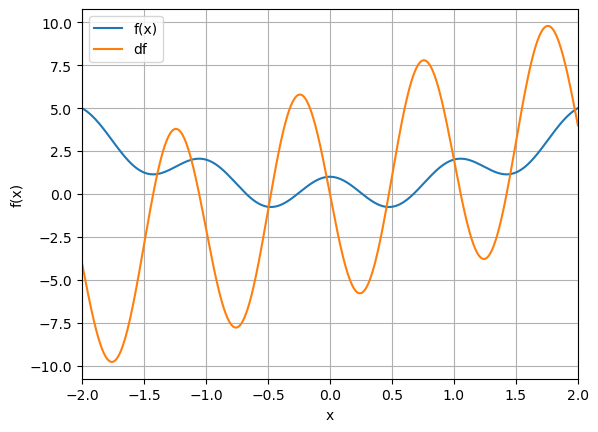

In [10]:
# plot the function and its derivative

# define a range for x
x = np.linspace(-2,2,2001)

make_plot(x, fx, deriv)

[1.954]


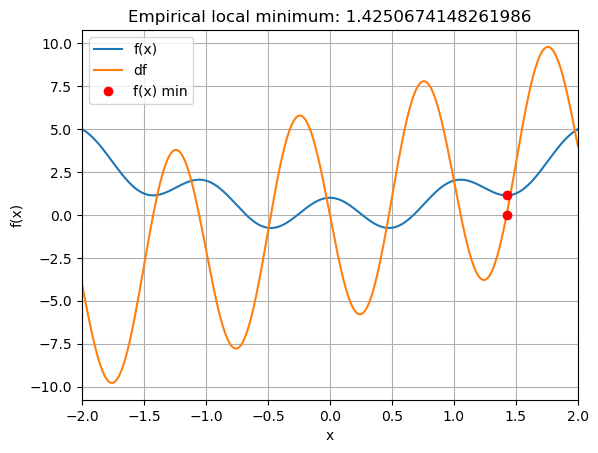

[-0.958]


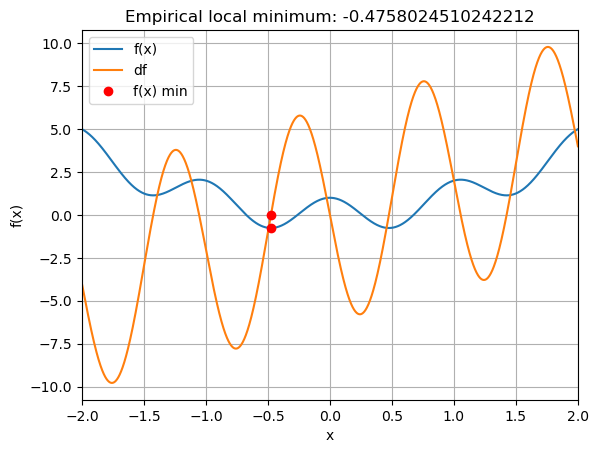

In [11]:
# As seen from the plots, there are multiple points where the derivative is 0, and there are multiple 
# local minima that the gradient descent can settle into. 
# Here I start from a random value twice and show that 1d gradient descent found diff local minima
for i in range(2):
  # random starting point
  localmin = np.random.choice(x,1)
  print(localmin)

  # learning parameters
  learning_rate = .01
  training_epochs = 100

  # run through training
  for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate*grad

  # plot the results
  make_plot(x, fx, deriv, localmin)

[0]


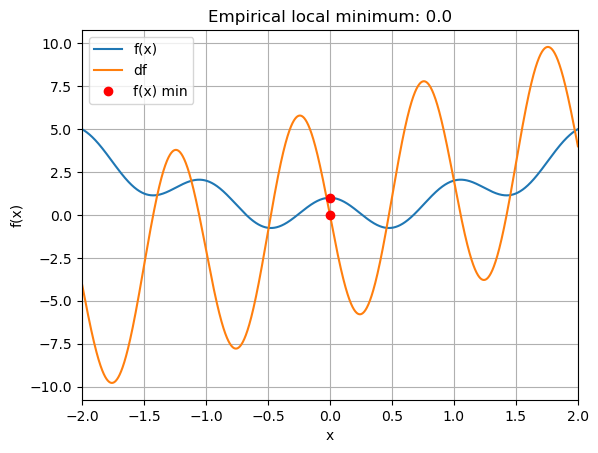

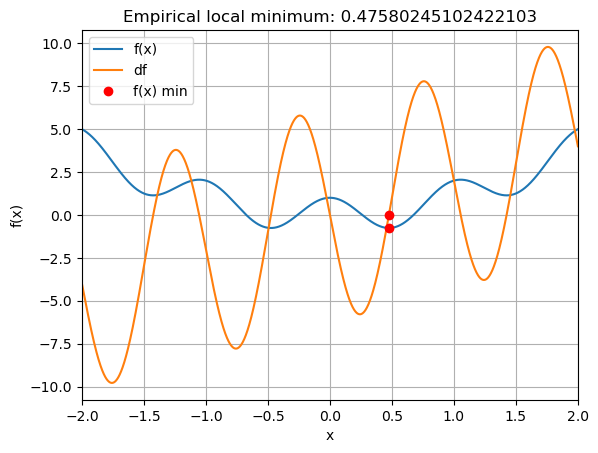

In [12]:
# if the starting point derivative is 0, such as in the case where starting at x=0, the gradient is 0
# So the step size learning_rate * gradient is 0, and gradient descent does not happen.
# to mitigate that, here I introduce a random perturbation to the gradient if the gradient is 0

# random starting point
localmin = np.array([0])
print(localmin)

# learning parameters
learning_rate = .01
training_epochs = 100

# run through training
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad
# plot the results
make_plot(x, fx, deriv, localmin)

# Here I add a random perturbation to the gradient if the gradient is 0
# run through training
for i in range(training_epochs):
  grad = deriv(localmin)
  if grad == 0:
    grad = np.random.uniform(-0.01, 0.01)
  localmin = localmin - learning_rate*grad
# plot the results
make_plot(x, fx, deriv, localmin)

## 2D function
Still easy to get trapped in local minima

In [20]:
# Use sympy here to calculate the derivative analytical solution
import sympy as sym # sympy to compute the partial derivatives

# the "peaks" function
def peaks(x,y):
  # expand to a 2D mesh
  x,y = np.meshgrid(x,y)
  z = 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) \
      - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2) \
      - 1/3*np.exp(-(x+1)**2 - y**2)
  return z

# create derivative functions using sympy
sx,sy = sym.symbols('sx,sy')
# define the function in sympy
sZ = 3*(1-sx)**2 * sym.exp(-(sx**2) - (sy+1)**2) \
      - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2-sy**2) \
      - 1/3*sym.exp(-(sx+1)**2 - sy**2)
# create derivative functions from the sympy-computed derivatives
df_x = sym.lambdify( (sx,sy),sym.diff(sZ,sx),'sympy' )
df_y = sym.lambdify( (sx,sy),sym.diff(sZ,sy),'sympy' )

[-1.34739624436821 0.204518866097005]
[-1.43651181  1.82973874]


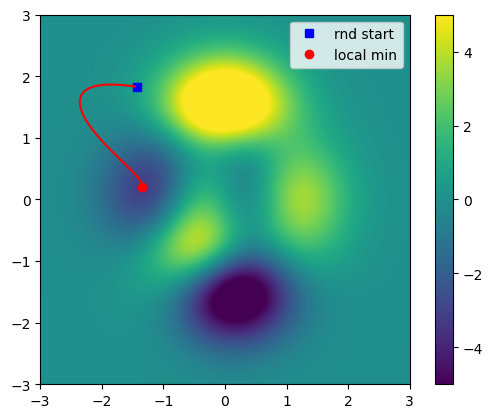

In [22]:
# random starting point (uniform between -2 and +2)
localmin = np.random.rand(2)*4-2 
startpnt = localmin[:] # make a copy, not re-assign

# learning parameters
learning_rate = .01
training_epochs = 1000

# run through training
trajectory = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = np.array([ df_x(localmin[0],localmin[1]).evalf(), 
                    df_y(localmin[0],localmin[1]).evalf() 
                  ])
  localmin = localmin - learning_rate*grad  # add _ or [:] to change a variable in-place
  trajectory[i,:] = localmin


print(localmin)
print(startpnt)

# let's have a look!
# create the landscape to plot the function
x = np.linspace(-3,3,201)
y = np.linspace(-3,3,201)
Z = peaks(x,y)
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
# plot the gradient descent result
plt.plot(startpnt[0],startpnt[1],'bs')
plt.plot(localmin[0],localmin[1],'ro')
plt.plot(trajectory[:,0],trajectory[:,1],'r')
plt.legend(['rnd start','local min'])
plt.colorbar()
plt.show()